In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io 
np.random.seed(1)
M = 64
A = 16
L = 5
J_k = 4
L_index = [5,13,26,50]

Phi = np.random.uniform(-0.5,0.5,L)
Omega = np.random.uniform(-0.5,0.5,L)
Varphi = np.random.uniform(-0.5,0.5,L)
Psi = np.random.uniform(-0.5,0.5,L)

Alpha = np.random.normal(size=L)
Beta = np.random.normal(size=L)
print(Omega)
print(Varphi)
print(Alpha)


[-0.40766141 -0.31373979 -0.15443927 -0.10323253  0.03881673]
[-0.08080549  0.1852195  -0.29554775  0.37811744 -0.47261241]
[ 1.13376944 -1.09989127 -0.17242821 -0.87785842  0.04221375]


In [2]:
def array_response(M, x):
    m = np.linspace(0, M-1, M)
    return np.exp(1j*2*np.pi*m*x)


In [3]:
def FFT(input):
    return np.abs(np.fft.fft(
            np.reshape(np.array(input), (1,-1))[0]
    ))

In [4]:
A_N  =[array_response(M, phi) for phi in Phi]
A_N = np.mat(np.vstack(A_N)).T
A_N_comprehensive = A_N * np.reshape(Alpha, (-1,1))


A_M  =[array_response(M, omega) for omega in Omega]
A_M = np.mat(np.vstack(A_M)).T
np.shape(A_M)
A_M_comprehensive = A_M * np.reshape(Alpha, (-1,1))
# A_M_comprehensive
B_k = np.mat(np.diag(Alpha))
s_k = np.mat([1 for i in range(A)]).T
A_M_k  =[array_response(M, varphi) for varphi in Varphi]
A_M_k = np.mat(np.vstack(A_M_k)).T
A_A_k  =[array_response(A, psi) for psi in Psi]
A_A_k = np.mat(np.vstack(A_A_k)).T

Delta = A_M.H * A_M_k * B_k * A_A_k.H * s_k
Delta_angle = np.angle(Delta)

distorted = A* Delta/np.max(A* Delta)
real = A * np.mat(np.ones((L,1)))
real = real / np.max(real)
# ratio_abs_storage = []
# ratio_real_storage = []
# ratio_imag_storage = []
# ratio_angle_storage = []

# for l_0 in range(L-1):
#     for l_1 in range(L-1 - l_0):
#         ratio_abs_storage.append(np.abs(Delta)[l_0          ,0]/ np.abs(Delta)[l_1+l_0 +1   ,0])
#         ratio_abs_storage.append(np.abs(Delta)[l_1+l_0 +1   ,0]/ np.abs(Delta)[l_0          ,0])
#         ratio_real_storage.append(np.real(Delta)[l_0          ,0]/ np.real(Delta)[l_1+l_0 +1   ,0])
#         ratio_real_storage.append(np.real(Delta)[l_1+l_0 +1   ,0]/ np.real(Delta)[l_0          ,0])
#         ratio_imag_storage.append(np.imag(Delta)[l_0          ,0]/ np.imag(Delta)[l_1+l_0 +1   ,0])
#         ratio_imag_storage.append(np.imag(Delta)[l_1+l_0 +1   ,0]/ np.imag(Delta)[l_0          ,0])
#         ratio_angle_storage.append(np.angle(Delta)[l_0          ,0]/ np.angle(Delta)[l_1+l_0 +1   ,0])
#         ratio_angle_storage.append(np.angle(Delta)[l_1+l_0 +1   ,0]/ np.angle(Delta)[l_0          ,0])
distortion_storage = []
for l in range(L):
    distortion_storage.append(
        np.power(
            np.abs(distorted[l])[0,0] / np.abs(real[l])[0,0], 2
            )
                              )


In [5]:
distortion_storage

[3.327489083114367e-05,
 0.00448310676033924,
 0.07322180252912039,
 1.0,
 0.09590814903511787]

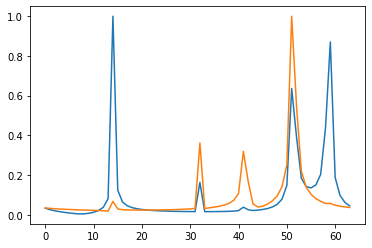

In [8]:
FFT_origin = FFT(A_N_comprehensive)
FFT_origin = FFT_origin/np.max(FFT_origin)
plt.plot(FFT_origin)

Y = A_N * A * A_M.H * A_M_k * B_k * A_A_k.H * s_k
FFT_Y = FFT(Y)
FFT_Y = FFT_Y/np.max(FFT_Y)
plt.plot(FFT_Y)
io.savemat('FFT_plot.mat', {
    'origin':       FFT_origin,
    'distorted':    FFT_Y
})

In [7]:
np.random.seed(1)
def generate_pdf(iseed = 0):
    Phi = np.random.uniform(-0.5,0.5,L)
    Omega = np.random.uniform(-0.5,0.5,L)
    Varphi = np.random.uniform(-0.5,0.5,L)
    Psi = np.random.uniform(-0.5,0.5,L)

    Alpha = np.random.normal(size=L)
    Beta = np.random.normal(size=L)
    A_N  =[array_response(M, phi) for phi in Phi]
    A_N = np.mat(np.vstack(A_N)).T
    A_N_comprehensive = A_N * np.reshape(Alpha, (-1,1))


    A_M  =[array_response(M, omega) for omega in Omega]
    A_M = np.mat(np.vstack(A_M)).T
    np.shape(A_M)
    A_M_comprehensive = A_M * np.reshape(Alpha, (-1,1))
    # A_M_comprehensive
    B_k = np.mat(np.diag(Alpha))
    s_k = np.mat([1 for i in range(A)]).T
    A_M_k  =[array_response(M, varphi) for varphi in Varphi]
    A_M_k = np.mat(np.vstack(A_M_k)).T
    A_A_k  =[array_response(A, psi) for psi in Psi]
    A_A_k = np.mat(np.vstack(A_A_k)).T

    Delta = A_M.H * A_M_k * B_k * A_A_k.H * s_k
    Delta_angle = np.angle(Delta)

    distorted = np.reshape(np.array(np.abs(A* Delta/np.max(A* Delta))), (1,-1))[0]
    real = A * np.mat(np.ones((L,1)))
    real = np.reshape(np.array(np.abs(real / np.max(real))), (1,-1))[0]
    
    distorted_amp = np.linalg.norm(distorted, ord=2)
    real_amp = np.linalg.norm(real, ord=2)
    real = real * distorted_amp / real_amp

    distortion_storage = []
    for l in range(L):
        distortion_storage.append(
            np.power(
                np.abs(distorted[l]) / np.abs(real[l]), 2
                )
                                )
    return distortion_storage

distortion_storage_all = []
for seed in range(1000):
    distortion_storage_all += generate_pdf(seed)
# distortion_storage_all

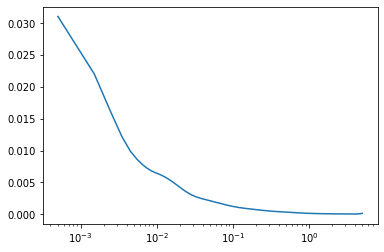

In [ ]:
from scipy.interpolate import UnivariateSpline

N = 1000 * L
n = N//1
# s = np.random.normal(size=N)                      # generate your data sample with N elements
p, x = np.histogram(distortion_storage_all, bins=n) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2                        # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)
fig = plt.figure(1)
ax = plt.axes()
plt.plot(x, f(x) / N)
ax.set_xscale('log')
plt.show()
